#### Importing Relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Data/1.01. Simple linear regression.csv')

In [3]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


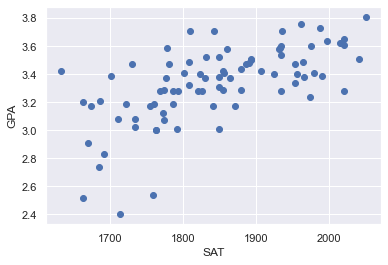

In [5]:
plt.scatter(data['SAT'],data['GPA'])
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [6]:
x1 = data['SAT']
y = data['GPA']

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           7.20e-11
Time:                        04:47:21   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

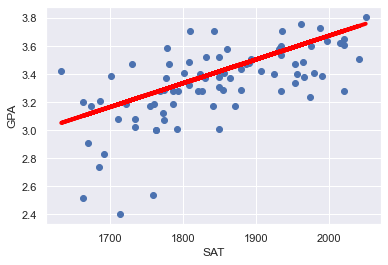

In [8]:
plt.scatter(data['SAT'],data['GPA'])
yhat = 0.2750 + 0.0017*x1
plt.plot(x1,yhat, lw=4, c='red')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [9]:
test_data = pd.DataFrame({'const':1,'SAT':[1700,1670]})

In [10]:
x1

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

In [11]:
x1 = sm.add_constant(x1)

In [12]:
x1

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [13]:
predictions = results.predict(x1)

In [14]:
table = x1.copy()

In [15]:
table['Predictions'] = predictions

In [16]:
table

,const,SAT,Predictions
0,1.0,1714,3.112890
1,1.0,1664,3.030105
2,1.0,1760,3.189051
3,1.0,1685,3.064875
4,1.0,1693,3.078120
...,...,...,...
79,1.0,1936,3.480452
80,1.0,1810,3.271836
81,1.0,1987,3.564892
82,1.0,1962,3.523500
